# Energy consumption data of city of Helsinki (project 4)
MD Arifuzzaman & Haroon Sadric

This code appears to be part of a data collection process for a Data Science project. It retrieves energy consumption data from the Nuuka cloud API for different locations and saves the data into a CSV file.

Here's an overview of what the code does:

--It sends a request to the Nuuka cloud API to retrieve a list of properties/locations using the requests.get() method.

--The response from the API is then parsed as JSON using the .json() method.

--A CSV file is created using the open() function in write mode, and a csv.writer object is initialized to write data to the file.

--The code loops over each item/location in the API response and constructs a new URL specific to that location to retrieve energy consumption data.

--Another request is made to the newly constructed URL to fetch the energy data for that location.

--If the request is successful (status code 200), the energy data is extracted from the JSON response and written to the CSV file row by row using the writer.writerow() method.

--If the request fails, an error message is printed indicating the location for which the request failed.

--Finally, a success message is printed indicating the creation of the CSV file.

This code serves as an initial step in collecting energy consumption data for analysis. It retrieves the data for a specified time range (January 1, 2019, to December 31, 2019) and saves it into a CSV file for further processing and analysis in a Data Science project.



In [93]:
import requests
import csv

location_link = 'https://helsinki-openapi.nuuka.cloud/api/v1.0/Property/List'
headers = {
    'user_agent': 'https://helsinki-openapi.nuuka.cloud/api/v1.0/Property/List'
}

page = requests.get(location_link, headers=headers)
response = page.json()

csv_file = 'data.csv'

with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Timestamp', 'Location', 'Value', 'Unit'])

    for item in response:
        location_Name = item['locationName']
        new_url = f'https://helsinki-openapi.nuuka.cloud/api/v1.0/EnergyData/Daily/ListByProperty?Record=LocationName&SearchString={location_Name}&ReportingGroup=Electricity&StartTime=2019-01-01&EndTime=2019-12-31'

        # Make a request to the new_url
        page = requests.get(new_url, headers=headers)
        
        if page.status_code == 200:
            json_data = page.json()
            
            # Process the JSON data and write to CSV
            for data in json_data:
                timestamp = data['timestamp']
                locationName = data['locationName']
                value = data['value']
                unit = data['unit']

                if isinstance(value, float):
                    value = str(value)  # Convert float to string or handle it as desired

                writer.writerow([timestamp, locationName, value, unit])
        else:
            print(f"Request failed for location: {location_Name}")

print(f"CSV file '{csv_file}' created successfully.")


Request failed for location: 1597 Lpk Lauttasaaren Ankkalampi (disabloitu)
Request failed for location: 1690 Oulunkylän seurahuone
Request failed for location: 1771 Pohjoiskaari  50 (disabloitu)
Request failed for location: 1804 Riihenkulma 2/Vanha Helsingintie 2
Request failed for location: 1832 Lpk Tammi/Metsolan ala-asteen koulu
Request failed for location: 1885 Itä-Helsingin musiikkiopisto ja Strömsin kartano
Request failed for location: 2203 Stadin am.op/Teollisuuskatu 23
Request failed for location: 4023 Olympiastadion/PO
Request failed for location: 4135 Perhekoti Marttila
Request failed for location: 4162 Lpk Yliskylä
Request failed for location: 4329 Kivelän vanhustenkeskus, Lpk Kivelä, Lpk Vaahtera
Request failed for location: 4356 Suutarilan terveyskeskus
Request failed for location: 4392 Strandmaninkuja 1, Stara Tuomarinkylän kartano
Request failed for location: 4420 Suutarinkylän peruskoulu+päiväkoti Vaskiniitty
Request failed for location: 4426 Stadin ammattiopisto/Sturen

In [119]:
#Import all Libraries
import numpy as np
import pandas as pd
import datetime # manipulating date formats
import os
import datetime
from matplotlib import pyplot as plt
import scipy.stats as stats


The provided DataFrame contains energy consumption data for different locations during the time period from January 1, 2019, to December 31, 2019. Here's some information about the DataFrame:

It has 205,322 rows and 4 columns.

The columns in the DataFrame are:

--Timestamp: Represents the date and time of the energy consumption measurement.
--Location: Indicates the name of the location where the measurement was taken.
--Value: Represents the energy consumption value for the corresponding timestamp and location.
--Unit: Indicates the unit of measurement for energy consumption (kWh).

The DataFrame provides a tabular representation of the energy consumption data, with each row corresponding to a specific measurement at a particular location and timestamp.

In [2]:
df = pd.read_csv('C:\\Users\\MD Arifuzzaman\\Documents\\Integrify_Assignment\\data_science_project\\Helsinki_city_electricisty_data.csv', encoding='latin1')
df

,Timestamp,Location,Value,Unit
0,2019-01-08T00:00:00,1000 Hakaniemen kauppahalli,0.00,kWh
1,2019-01-09T00:00:00,1000 Hakaniemen kauppahalli,0.00,kWh
2,2019-01-10T00:00:00,1000 Hakaniemen kauppahalli,0.00,kWh
3,2019-01-11T00:00:00,1000 Hakaniemen kauppahalli,20.10,kWh
4,2019-01-12T00:00:00,1000 Hakaniemen kauppahalli,30.56,kWh
...,...,...,...,...
205317,2019-01-02T00:00:00,2287 Lpk Lasten Kartano/Malminkartanon nuoriso...,15.96,kWh
205318,2019-01-03T00:00:00,2287 Lpk Lasten Kartano/Malminkartanon nuoriso...,16.98,kWh
205319,2019-01-04T00:00:00,2287 Lpk Lasten Kartano/Malminkartanon nuoriso...,20.16,kWh
205320,2019-01-05T00:00:00,2287 Lpk Lasten Kartano/Malminkartanon nuoriso...,0.00,kWh


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205322 entries, 0 to 205321
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Timestamp  205322 non-null  object 
 1   Location   205322 non-null  object 
 2   Value      205322 non-null  float64
 3   Unit       205322 non-null  object 
dtypes: float64(1), object(3)
memory usage: 6.3+ MB


In [4]:
df.describe()  #Here only Value is Numeric. So we are gettiing insights from Value

,Value
count,205322.000000
mean,926.803897
std,1929.406757
min,0.000000
25%,159.900000
50%,365.580000
75%,916.217500
max,33236.860000


In [5]:
df['Location'].describe() #how many Unique city have in this  dataframe

count                         205322
unique                           579
top       4027 Tahvonlahden ala-aste
freq                             365
Name: Location, dtype: object

In [6]:
df['Date'] = pd.to_datetime(df['Timestamp']).dt.date  #just take the date part and drop the time part
df['Date']


0         2019-01-08
1         2019-01-09
2         2019-01-10
3         2019-01-11
4         2019-01-12
             ...    
205317    2019-01-02
205318    2019-01-03
205319    2019-01-04
205320    2019-01-05
205321    2019-01-06
Name: Date, Length: 205322, dtype: object

In [7]:
df # See New dataframe

,Timestamp,Location,Value,Unit,Date
0,2019-01-08T00:00:00,1000 Hakaniemen kauppahalli,0.00,kWh,2019-01-08
1,2019-01-09T00:00:00,1000 Hakaniemen kauppahalli,0.00,kWh,2019-01-09
2,2019-01-10T00:00:00,1000 Hakaniemen kauppahalli,0.00,kWh,2019-01-10
3,2019-01-11T00:00:00,1000 Hakaniemen kauppahalli,20.10,kWh,2019-01-11
4,2019-01-12T00:00:00,1000 Hakaniemen kauppahalli,30.56,kWh,2019-01-12
...,...,...,...,...,...
205317,2019-01-02T00:00:00,2287 Lpk Lasten Kartano/Malminkartanon nuoriso...,15.96,kWh,2019-01-02
205318,2019-01-03T00:00:00,2287 Lpk Lasten Kartano/Malminkartanon nuoriso...,16.98,kWh,2019-01-03
205319,2019-01-04T00:00:00,2287 Lpk Lasten Kartano/Malminkartanon nuoriso...,20.16,kWh,2019-01-04
205320,2019-01-05T00:00:00,2287 Lpk Lasten Kartano/Malminkartanon nuoriso...,0.00,kWh,2019-01-05


In [8]:
df = df[['Date','Location','Value','Unit']]
df   #See new dataframe

,Date,Location,Value,Unit
0,2019-01-08,1000 Hakaniemen kauppahalli,0.00,kWh
1,2019-01-09,1000 Hakaniemen kauppahalli,0.00,kWh
2,2019-01-10,1000 Hakaniemen kauppahalli,0.00,kWh
3,2019-01-11,1000 Hakaniemen kauppahalli,20.10,kWh
4,2019-01-12,1000 Hakaniemen kauppahalli,30.56,kWh
...,...,...,...,...
205317,2019-01-02,2287 Lpk Lasten Kartano/Malminkartanon nuoriso...,15.96,kWh
205318,2019-01-03,2287 Lpk Lasten Kartano/Malminkartanon nuoriso...,16.98,kWh
205319,2019-01-04,2287 Lpk Lasten Kartano/Malminkartanon nuoriso...,20.16,kWh
205320,2019-01-05,2287 Lpk Lasten Kartano/Malminkartanon nuoriso...,0.00,kWh


In [9]:
df.groupby(['Unit','Location'])['Location'].count()
#here we see that all of our Electricity Unit is not KWh. One city has another Measurement Unit as well (m3)

Unit  Location                                                                       
kWh   1000 Hakaniemen kauppahalli                                                        358
      1001 Hietalahden kauppahalli                                                       361
      1002 Vanha kauppahalli                                                             361
      1037 Vuotalo                                                                       361
      1507 Suutarilan monitoimitalo/ala-aste ja Lpk Seulanen                             361
                                                                                        ... 
      6478 Savonkatu 4, Stadin ammattiopisto                                             361
      6492 Kontukuja 5, Kontulan monipuolinen palvelukeskus                              361
      6743 Kivikonkuja 4, terveydenhuollon päätearkisto                                  361
      6760 Kaupunkiympäristön toimiala, 44572 Kaupunkiympäristön toimitalo (d

In [10]:
new_df = df[df['Unit']!='m3']
new_df.groupby(['Unit','Location'])['Location'].count()   
#number of recorded values are not same. so there is maybe some missing values as well. 

Unit  Location                                                                       
kWh   1000 Hakaniemen kauppahalli                                                        358
      1001 Hietalahden kauppahalli                                                       361
      1002 Vanha kauppahalli                                                             361
      1037 Vuotalo                                                                       361
      1507 Suutarilan monitoimitalo/ala-aste ja Lpk Seulanen                             361
                                                                                        ... 
      6477 Muotoilijankatu 3, Stadin ammattiopisto                                       361
      6478 Savonkatu 4, Stadin ammattiopisto                                             361
      6492 Kontukuja 5, Kontulan monipuolinen palvelukeskus                              361
      6743 Kivikonkuja 4, terveydenhuollon päätearkisto                      

In [63]:
groups_loc = df.groupby('Location')

# divide into different dataframes for each location
locs = [groups_loc.get_group(loc).set_index('Date')['Value'] for loc in groups_loc.groups]

# remove duplicated rows
locs = [df[~df.index.duplicated(keep='first')] for df in locs]

Date_loc = pd.concat(locs, join='outer', axis=1,  ignore_index=True)

Date_loc.reset_index(level=0, inplace=True)

Date_loc.rename(columns={'index': 'Date'}, inplace=True)

#Date_loc.columns = groups_loc.groups.keys() #location namewise in column

Date_loc


,Date,0,1,2,3,4,5,6,7,8,...,569,570,571,572,573,574,575,576,577,578
0,2019-01-01,NaN,887.24,446.45,1775.63,1435.47,276.28,144.64,585.87,0.35,...,597.35,149.47,638.63,1036.44,1074.53,1069.2,1474.15,5644.72,839.95,NaN
1,2019-01-02,NaN,1123.33,632.00,2235.90,1721.09,502.08,187.52,607.56,0.35,...,773.22,310.21,916.87,1428.48,2675.23,1938.0,1648.79,5901.28,920.16,NaN
2,2019-01-03,NaN,998.30,791.75,2176.95,1643.99,501.08,179.56,668.75,0.35,...,777.97,311.55,939.87,1440.60,1733.00,1953.6,1198.42,5514.40,880.66,NaN
3,2019-01-04,NaN,1211.51,692.95,2198.87,1634.40,516.58,182.92,674.84,0.35,...,760.75,295.39,903.72,1422.36,2908.32,1964.8,1790.94,5834.67,892.68,NaN
4,2019-01-05,NaN,1162.45,692.50,2073.77,1360.43,329.82,74.08,680.31,0.36,...,576.20,142.18,489.73,1170.84,1187.90,1064.0,991.38,5195.75,805.62,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,34.06,1165.14,607.00,2734.12,1780.68,452.88,147.56,586.54,0.00,...,665.06,471.96,777.22,660.48,1507.04,1640.0,1563.79,5419.32,684.17,2228.16
361,2019-12-28,64.18,1184.67,693.20,2563.72,1363.52,343.14,72.44,612.14,0.00,...,553.50,324.13,401.63,554.88,924.79,1090.4,847.90,4879.04,618.41,1435.52
362,2019-12-29,1.51,886.31,420.55,2406.35,1257.60,289.67,73.00,645.90,0.00,...,546.49,322.35,398.91,555.60,927.02,1044.4,997.44,4821.19,624.39,1399.04
363,2019-12-30,2.28,1084.05,399.30,2760.30,1863.64,499.47,146.72,537.75,0.00,...,677.38,483.04,843.78,686.88,1526.55,1774.0,1476.41,5421.80,689.85,2330.24


In [64]:
Date_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Columns: 580 entries, Date to 578
dtypes: datetime64[ns](1), float64(579)
memory usage: 1.6 MB


In [65]:
Date_loc.isnull().sum()

Date     0
0        7
1        4
2        4
3        4
        ..
574      4
575      4
576      4
577      4
578     80
Length: 580, dtype: int64

In [66]:
# Calculate the number of missing values in each column
missing_values = Date_loc.isna().sum()

# Filter columns with less than 100 missing values
Date_loc = Date_loc[missing_values[missing_values < 100].index]

Date_loc


,Date,0,1,2,3,4,5,6,7,8,...,569,570,571,572,573,574,575,576,577,578
0,2019-01-01,NaN,887.24,446.45,1775.63,1435.47,276.28,144.64,585.87,0.35,...,597.35,149.47,638.63,1036.44,1074.53,1069.2,1474.15,5644.72,839.95,NaN
1,2019-01-02,NaN,1123.33,632.00,2235.90,1721.09,502.08,187.52,607.56,0.35,...,773.22,310.21,916.87,1428.48,2675.23,1938.0,1648.79,5901.28,920.16,NaN
2,2019-01-03,NaN,998.30,791.75,2176.95,1643.99,501.08,179.56,668.75,0.35,...,777.97,311.55,939.87,1440.60,1733.00,1953.6,1198.42,5514.40,880.66,NaN
3,2019-01-04,NaN,1211.51,692.95,2198.87,1634.40,516.58,182.92,674.84,0.35,...,760.75,295.39,903.72,1422.36,2908.32,1964.8,1790.94,5834.67,892.68,NaN
4,2019-01-05,NaN,1162.45,692.50,2073.77,1360.43,329.82,74.08,680.31,0.36,...,576.20,142.18,489.73,1170.84,1187.90,1064.0,991.38,5195.75,805.62,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,34.06,1165.14,607.00,2734.12,1780.68,452.88,147.56,586.54,0.00,...,665.06,471.96,777.22,660.48,1507.04,1640.0,1563.79,5419.32,684.17,2228.16
361,2019-12-28,64.18,1184.67,693.20,2563.72,1363.52,343.14,72.44,612.14,0.00,...,553.50,324.13,401.63,554.88,924.79,1090.4,847.90,4879.04,618.41,1435.52
362,2019-12-29,1.51,886.31,420.55,2406.35,1257.60,289.67,73.00,645.90,0.00,...,546.49,322.35,398.91,555.60,927.02,1044.4,997.44,4821.19,624.39,1399.04
363,2019-12-30,2.28,1084.05,399.30,2760.30,1863.64,499.47,146.72,537.75,0.00,...,677.38,483.04,843.78,686.88,1526.55,1774.0,1476.41,5421.80,689.85,2330.24


In [67]:
#fill all zero and NaN values
columns_mean = Date_loc.mean()
Date_loc = Date_loc.replace(0.00, columns_mean) # lots of zero values here as well thats why fill with columns mean
Date_loc = Date_loc.fillna(columns_mean) # all NaN values fill with columns mean value
Date_loc

C:\Users\MD Arifuzzaman\AppData\Local\Temp\ipykernel_1572\1422583841.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  columns_mean = Date_loc.mean()


,Date,0,1,2,3,4,5,6,7,8,...,569,570,571,572,573,574,575,576,577,578
0,2019-01-01,37.040335,887.24,446.45,1775.63,1435.47,276.28,144.64,585.87,0.350000,...,597.35,149.47,638.63,1036.44,1074.53,1069.2,1474.15,5644.72,839.95,2166.066912
1,2019-01-02,37.040335,1123.33,632.00,2235.90,1721.09,502.08,187.52,607.56,0.350000,...,773.22,310.21,916.87,1428.48,2675.23,1938.0,1648.79,5901.28,920.16,2166.066912
2,2019-01-03,37.040335,998.30,791.75,2176.95,1643.99,501.08,179.56,668.75,0.350000,...,777.97,311.55,939.87,1440.60,1733.00,1953.6,1198.42,5514.40,880.66,2166.066912
3,2019-01-04,37.040335,1211.51,692.95,2198.87,1634.40,516.58,182.92,674.84,0.350000,...,760.75,295.39,903.72,1422.36,2908.32,1964.8,1790.94,5834.67,892.68,2166.066912
4,2019-01-05,37.040335,1162.45,692.50,2073.77,1360.43,329.82,74.08,680.31,0.360000,...,576.20,142.18,489.73,1170.84,1187.90,1064.0,991.38,5195.75,805.62,2166.066912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,34.060000,1165.14,607.00,2734.12,1780.68,452.88,147.56,586.54,0.012685,...,665.06,471.96,777.22,660.48,1507.04,1640.0,1563.79,5419.32,684.17,2228.160000
361,2019-12-28,64.180000,1184.67,693.20,2563.72,1363.52,343.14,72.44,612.14,0.012685,...,553.50,324.13,401.63,554.88,924.79,1090.4,847.90,4879.04,618.41,1435.520000
362,2019-12-29,1.510000,886.31,420.55,2406.35,1257.60,289.67,73.00,645.90,0.012685,...,546.49,322.35,398.91,555.60,927.02,1044.4,997.44,4821.19,624.39,1399.040000
363,2019-12-30,2.280000,1084.05,399.30,2760.30,1863.64,499.47,146.72,537.75,0.012685,...,677.38,483.04,843.78,686.88,1526.55,1774.0,1476.41,5421.80,689.85,2330.240000


In [68]:
Date_loc.isna().sum()   #No null values 

Date    0
0       0
1       0
2       0
3       0
       ..
574     0
575     0
576     0
577     0
578     0
Length: 568, dtype: int64

In [69]:
Date_loc.describe()

,0,1,2,3,4,5,6,7,8,9,...,569,570,571,572,573,574,575,576,577,578
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,37.750698,1031.999335,393.059972,2584.120111,1972.401884,479.852604,219.636822,401.391357,0.024883,248.864488,...,581.025623,363.997950,672.400720,1309.201330,2418.720194,1962.074238,1730.709723,5775.612161,840.670139,2166.066912
std,23.300703,123.677980,155.119440,345.201959,401.819992,170.274721,109.020701,200.574333,0.062914,76.560506,...,110.376547,104.909579,193.380375,267.133696,959.774542,537.485006,503.998193,563.692137,162.368790,397.610403
min,0.690000,679.500000,172.300000,1464.130000,1217.090000,189.220000,61.360000,52.630000,0.012685,106.480000,...,298.360000,141.580000,322.240000,554.880000,913.030000,1011.600000,847.900000,4188.350000,309.910000,1350.400000
25%,17.070000,966.100000,288.600000,2366.550000,1587.070000,301.350000,78.640000,201.020000,0.012685,165.440000,...,489.100000,315.370000,422.190000,1150.920000,1319.770000,1516.800000,1168.260000,5434.970000,753.900000,2166.066912
50%,41.360000,1049.760000,333.800000,2614.030000,2113.880000,522.230000,268.440000,420.700000,0.012685,273.920000,...,602.730000,346.760000,745.440000,1404.360000,2904.020000,2090.800000,1894.830000,5774.960000,863.760000,2283.200000
75%,53.190000,1121.210000,472.450000,2829.120000,2297.620000,633.260000,315.640000,582.570000,0.012685,293.120000,...,680.470000,477.490000,816.770000,1459.560000,3292.790000,2287.200000,2163.320000,6011.210000,944.530000,2466.240000
max,120.400000,1257.600000,817.300000,3302.990000,2620.540000,820.910000,416.680000,713.070000,0.360000,450.880000,...,781.250000,528.920000,966.110000,1931.880000,3608.640000,3391.200000,2514.490000,8016.640000,1278.310000,2735.360000


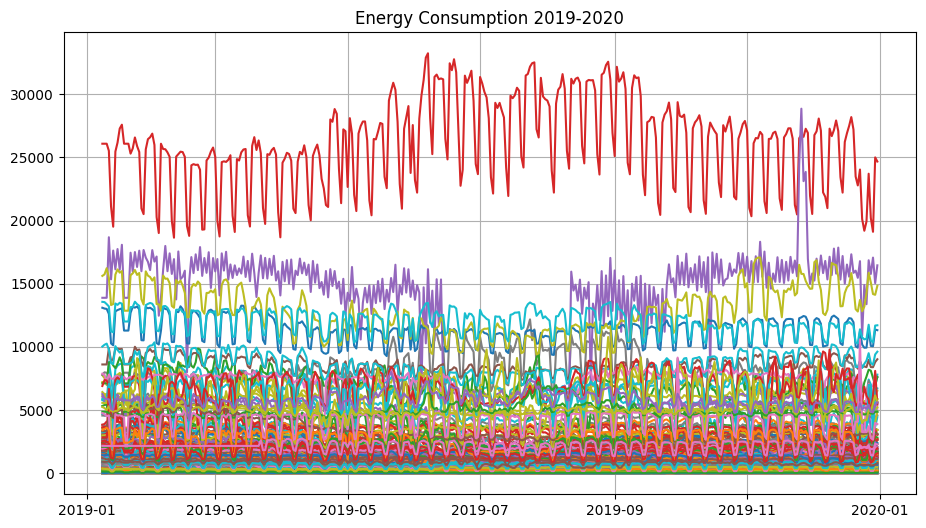

In [76]:
# Convert 'Date' column to datetime type
Date_loc['Date'] = pd.to_datetime(Date_loc['Date'])

# Set 'Date' as the index
Date_loc.set_index('Date', inplace=True)

# Convert date strings to datetime objects
start_date = datetime.datetime.strptime('2019-01-08', '%Y-%m-%d').date()
end_date = datetime.datetime.strptime('2019-12-31', '%Y-%m-%d').date()

# Perform the slice operation
Date_2019_1 = Date_loc[start_date:end_date]

# Create a single subplot
fig, ax = plt.subplots(figsize=(11, 6))

# Plot the data
ax.plot(Date_2019_1, '-')
ax.set_title('Energy Consumption 2019-2020')
ax.grid(True)

# Display the plot
plt.show()


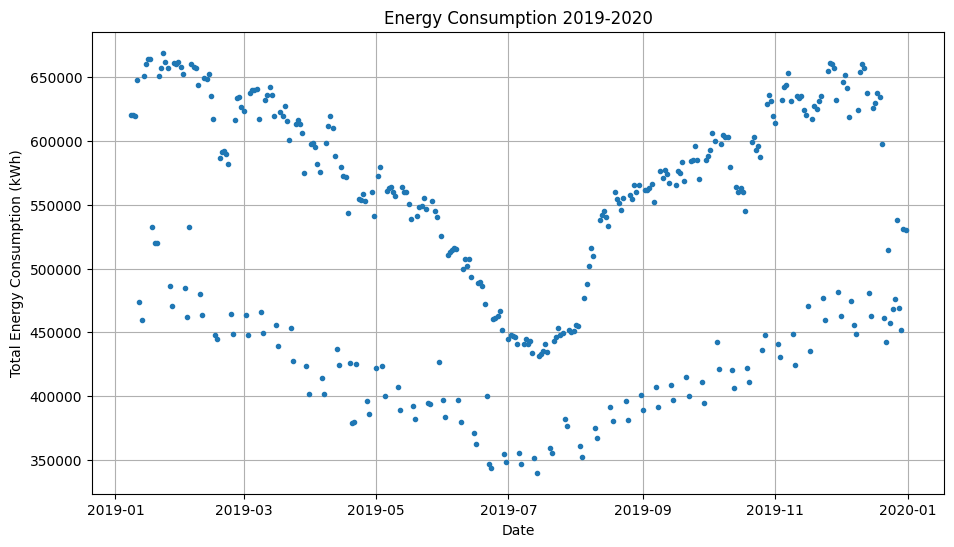

In [78]:
# Calculate the total consumption by summing the values of each row
yearly_con = Date_2019_1.sum(axis=1).to_frame(name='kWh')

# Rename the index to 'Date'
yearly_con.index.rename('Date', inplace=True)

# Create a single subplot
fig, ax = plt.subplots(figsize=(11, 6))

# Plot the data
ax.plot(yearly_con.index, yearly_con['kWh'], '.')
ax.set_title('Energy Consumption 2019-2020')
ax.set_xlabel('Date')
ax.set_ylabel('Total Energy Consumption (kWh)')
ax.grid(True)

# Display the plot
plt.show()


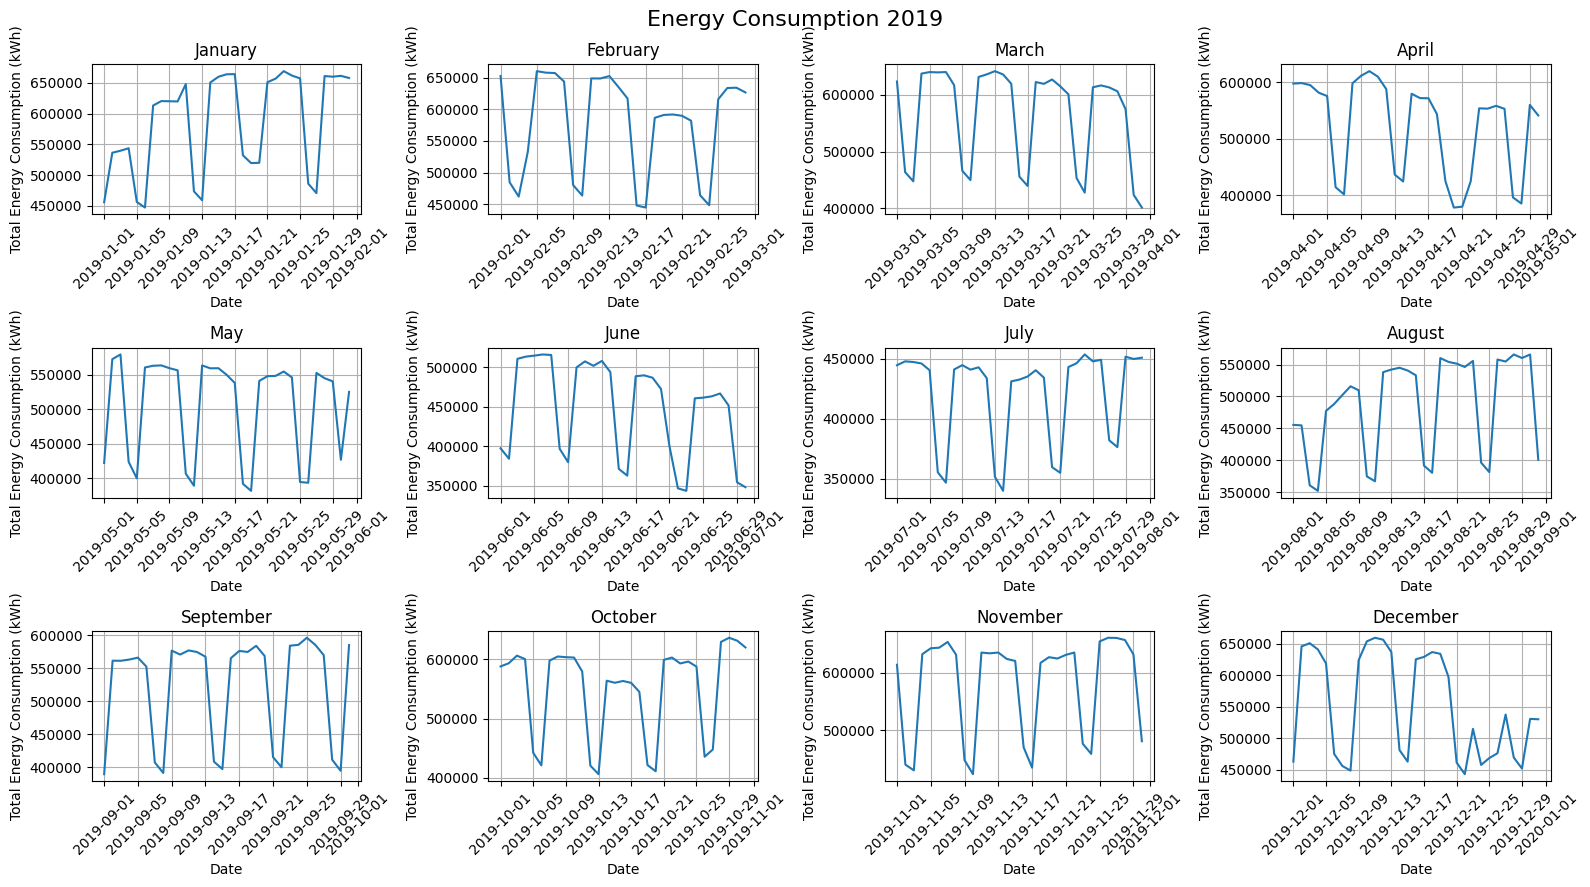

In [98]:
# Create a figure and subplots for each month
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 9))
fig.suptitle('Energy Consumption 2019', fontsize=16)

# Iterate over the months and plot the data
for month in range(1, 13):
    month_data = yearly_con[yearly_con.index.month == month]
    ax = axes[(month - 1) // 4, (month - 1) % 4]
    ax.plot(month_data.index, month_data['kWh'], '-')
    ax.set_title(month_data.index[0].strftime('%B'))
    ax.set_xlabel('Date')
    ax.set_ylabel('Total Energy Consumption (kWh)')
    ax.grid(True)
    ax.xaxis.set_tick_params(rotation=45)

# Adjust the layout
plt.tight_layout()
plt.show()


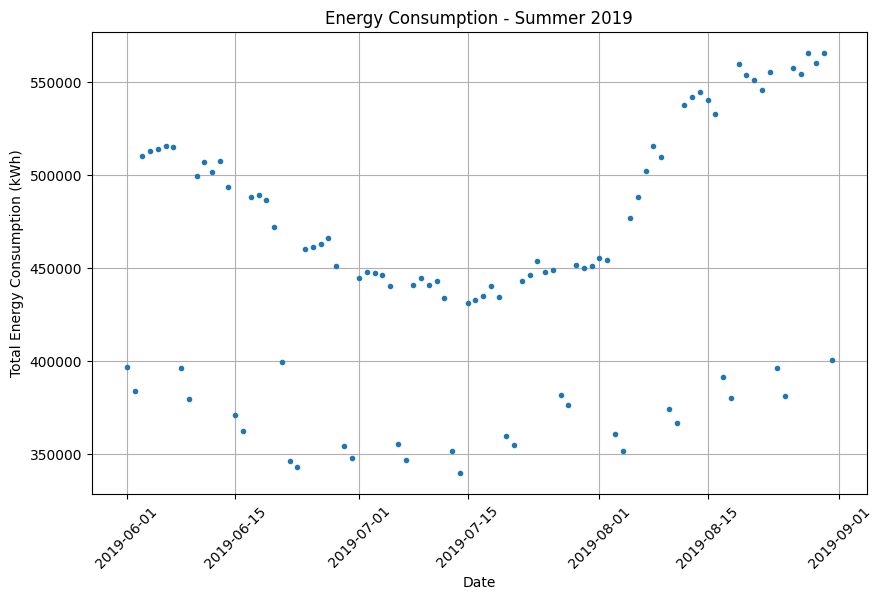

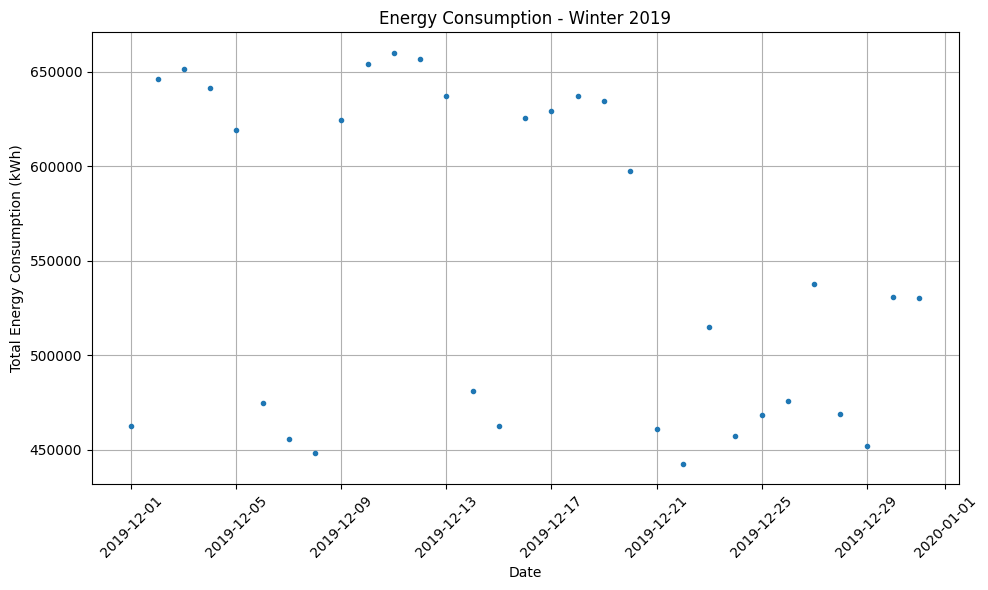

In [103]:
# Define the datetime ranges for summer and winter seasons
summer_range = (datetime.date(start_date.year, 6, 1), datetime.date(start_date.year, 8, 31))
winter_range = (datetime.date(start_date.year, 12, 1), datetime.date(end_date.year, 12, 31))

# Create a figure and subplots for summer
fig, ax_summer = plt.subplots(figsize=(10, 6))
ax_summer.set_title('Energy Consumption - Summer 2019')
ax_summer.set_xlabel('Date')
ax_summer.set_ylabel('Total Energy Consumption (kWh)')
ax_summer.grid(True)

# Plot the data for summer
summer_data = yearly_con[summer_range[0]:summer_range[1]]
ax_summer.plot(summer_data.index, summer_data['kWh'], '.')

# Rotate x-axis tick labels for better readability
ax_summer.xaxis.set_tick_params(rotation=45)

# Create a figure and subplots for winter
fig, ax_winter = plt.subplots(figsize=(10, 6))
ax_winter.set_title('Energy Consumption - Winter 2019')
ax_winter.set_xlabel('Date')
ax_winter.set_ylabel('Total Energy Consumption (kWh)')
ax_winter.grid(True)

# Plot the data for winter
winter_data = yearly_con[winter_range[0]:winter_range[1]]
ax_winter.plot(winter_data.index, winter_data['kWh'], '.')

# Rotate x-axis tick labels for better readability
ax_winter.xaxis.set_tick_params(rotation=45)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


In [104]:
groups_loc = df.groupby('Location')

# divide into different dataframes for each location
locs = [groups_loc.get_group(loc).set_index('Date')['Value'] for loc in groups_loc.groups]

# remove duplicated rows
locs = [df[~df.index.duplicated(keep='first')] for df in locs]

Date_loc = pd.concat(locs, join='outer', axis=1,  ignore_index=True)

Date_loc.columns = groups_loc.groups.keys() #location namewise in column

Date_loc


,1000 Hakaniemen kauppahalli,1001 Hietalahden kauppahalli,1002 Vanha kauppahalli,1037 Vuotalo,1507 Suutarilan monitoimitalo/ala-aste ja Lpk Seulanen,1508 Monitoimitalo Puustelli,1509 Lpk Karvikka ja rppk Lemmikki,1511 Pauligin huvila,1512 Malmin raitti 3,1513 Psykiatrinen poliklinikka,...,"6472 Vuorensyrjä 8, Jakomäen terveysasema","6473 Luutnantintie 12-16, Malminkartanon terveyskeskus","6474 Pikkalankatu 5, Malmin virastotalo","6475 Toinen linja 7, toimistorakennus (disabled)","6476 Vilppulantie 14, Stadin ammattiopisto","6477 Muotoilijankatu 3, Stadin ammattiopisto","6478 Savonkatu 4, Stadin ammattiopisto","6492 Kontukuja 5, Kontulan monipuolinen palvelukeskus","6743 Kivikonkuja 4, terveydenhuollon päätearkisto","6760 Kaupunkiympäristön toimiala, 44572 Kaupunkiympäristön toimitalo (disabled)"
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,NaN,887.24,446.45,1775.63,1435.47,276.28,144.64,585.87,0.35,202.64,...,597.35,149.47,638.63,1036.44,1074.53,1069.2,1474.15,5644.72,839.95,NaN
2019-01-02,NaN,1123.33,632.00,2235.90,1721.09,502.08,187.52,607.56,0.35,313.68,...,773.22,310.21,916.87,1428.48,2675.23,1938.0,1648.79,5901.28,920.16,NaN
2019-01-03,NaN,998.30,791.75,2176.95,1643.99,501.08,179.56,668.75,0.35,308.16,...,777.97,311.55,939.87,1440.60,1733.00,1953.6,1198.42,5514.40,880.66,NaN
2019-01-04,NaN,1211.51,692.95,2198.87,1634.40,516.58,182.92,674.84,0.35,310.16,...,760.75,295.39,903.72,1422.36,2908.32,1964.8,1790.94,5834.67,892.68,NaN
2019-01-05,NaN,1162.45,692.50,2073.77,1360.43,329.82,74.08,680.31,0.36,158.40,...,576.20,142.18,489.73,1170.84,1187.90,1064.0,991.38,5195.75,805.62,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,34.06,1165.14,607.00,2734.12,1780.68,452.88,147.56,586.54,0.00,386.00,...,665.06,471.96,777.22,660.48,1507.04,1640.0,1563.79,5419.32,684.17,2228.16
2019-12-28,64.18,1184.67,693.20,2563.72,1363.52,343.14,72.44,612.14,0.00,189.92,...,553.50,324.13,401.63,554.88,924.79,1090.4,847.90,4879.04,618.41,1435.52
2019-12-29,1.51,886.31,420.55,2406.35,1257.60,289.67,73.00,645.90,0.00,189.12,...,546.49,322.35,398.91,555.60,927.02,1044.4,997.44,4821.19,624.39,1399.04


In [105]:
columns_mean = df.mean()
df = df.fillna(columns_mean)
df

C:\Users\MD Arifuzzaman\AppData\Local\Temp\ipykernel_1572\3505443639.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  columns_mean = df.mean()
C:\Users\MD Arifuzzaman\AppData\Local\Temp\ipykernel_1572\3505443639.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  columns_mean = df.mean()


,Date,Location,Value,Unit
3980,2019-01-01,1521 Harjun NT (disabled),78.05,kWh
48308,2019-01-01,"4031 Hammarskjöldintie, Kaupungin puutarha",828.24,kWh
45075,2019-01-01,4017 Lpk Eira,46.80,kWh
168790,2019-01-01,4534 Lp Mustakivi,17.26,kWh
121145,2019-01-01,"4314 Lpk Kotikallio, Rppk ja Vallian a-a",284.25,kWh
...,...,...,...,...
99392,2019-12-31,4232 Lpk Ylä-Malmi,483.32,kWh
97226,2019-12-31,4223 Naulakallion koulu,906.75,kWh
14078,2019-12-31,"1668 Kyläsaarenkatu 8, Stara toimipiste",5883.31,kWh
108876,2019-12-31,4269 Lpk Portti,111.24,kWh


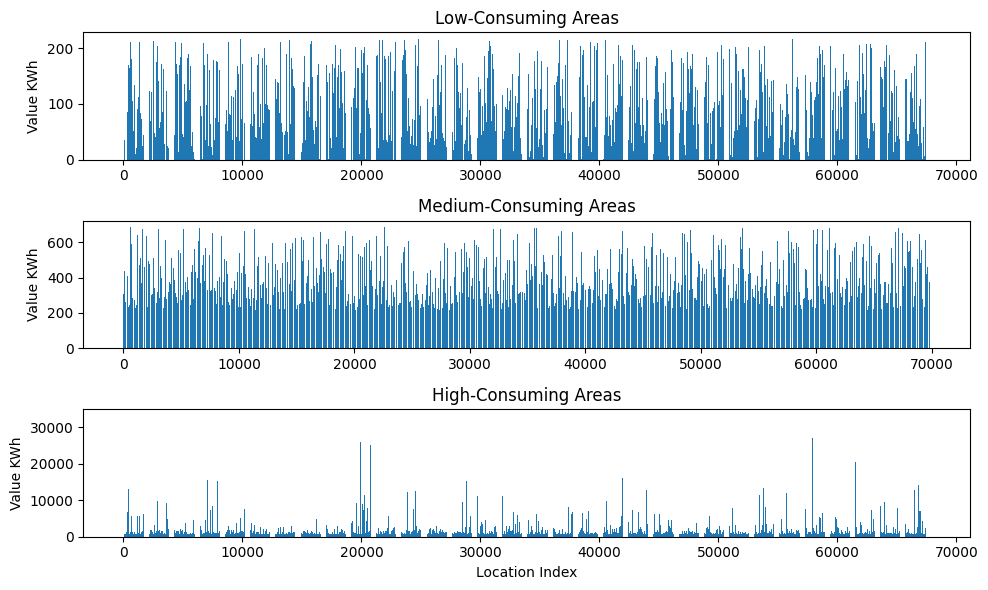

In [107]:

# Calculate the consumption threshold values for low, medium, and high-consuming areas
threshold_low = df['Value'].quantile(0.33)
threshold_high = df['Value'].quantile(0.67)

# Filter the DataFrame to include only the rows corresponding to the low, medium, and high-consuming areas
low_consuming_df = df[df['Value'] <= threshold_low]
medium_consuming_df = df[(df['Value'] > threshold_low) & (df['Value'] <= threshold_high)]
high_consuming_df = df[df['Value'] > threshold_high]

# Create three separate bar plots for low, medium, and high-consuming areas
fig, axes = plt.subplots(nrows=3, figsize=(10, 6))

# Low-consuming areas
axes[0].bar(range(len(low_consuming_df)), low_consuming_df['Value'])
axes[0].set_ylabel('Value KWh')
axes[0].set_title('Low-Consuming Areas')

# Medium-consuming areas
axes[1].bar(range(len(medium_consuming_df)), medium_consuming_df['Value'])
axes[1].set_ylabel('Value KWh')
axes[1].set_title('Medium-Consuming Areas')

# High-consuming areas
axes[2].bar(range(len(high_consuming_df)), high_consuming_df['Value'])
axes[2].set_xlabel('Location Index')
axes[2].set_ylabel('Value KWh')
axes[2].set_title('High-Consuming Areas')

# Adjust the layout to prevent overlapping of x-axis labels
plt.tight_layout()

# Display the plots
plt.show()


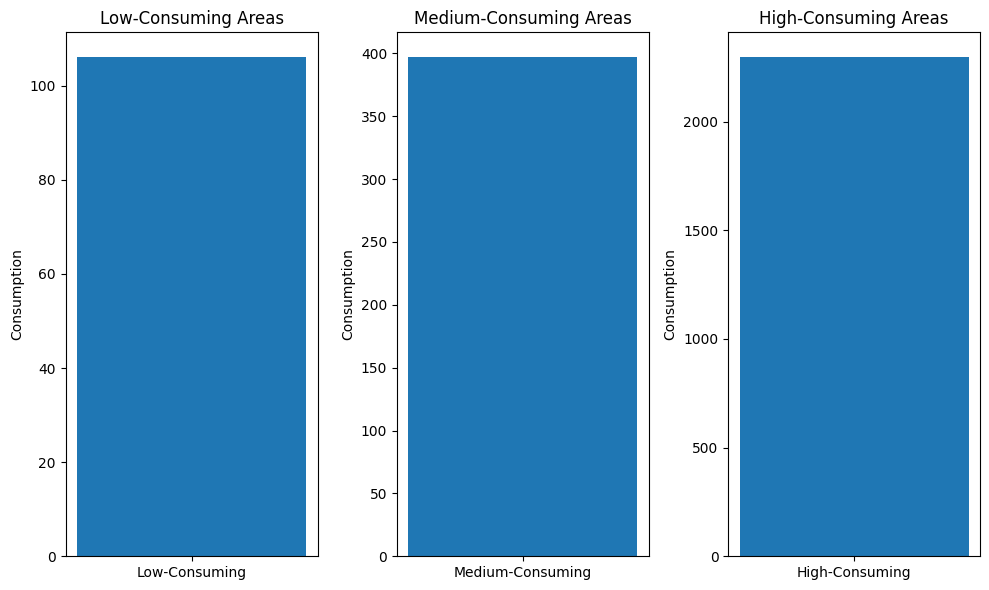

In [109]:
# Categorize the locations based on consumption levels
df['Category'] = pd.cut(df['Value'], bins=[df['Value'].min(), threshold_low, threshold_high, df['Value'].max()], labels=['Low-Consuming', 'Medium-Consuming', 'High-Consuming'])

# Group the DataFrame by category and calculate the average consumption for each category
category_data = df.groupby('Category')['Value'].mean()

# Create a bar plot for each category
plt.figure(figsize=(10, 6))

plt.subplot(131)
low_consuming = category_data['Low-Consuming']
plt.bar('Low-Consuming', low_consuming)
#plt.xlabel('Low-Consuming')
plt.ylabel('Consumption')
plt.title('Low-Consuming Areas')

plt.subplot(132)
medium_consuming = category_data['Medium-Consuming']
plt.bar('Medium-Consuming', medium_consuming)
#plt.xlabel('Medium-Consuming')
plt.ylabel('Consumption')
plt.title('Medium-Consuming Areas')

plt.subplot(133)
high_consuming = category_data['High-Consuming']
plt.bar('High-Consuming', high_consuming)
#plt.xlabel('High-Consuming')
plt.ylabel('Consumption')
plt.title('High-Consuming Areas')

# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()


In [110]:
# Group the DataFrame by category and get the locations for each category
low_consuming_locations = df[df['Category'] == 'Low-Consuming']['Location']
medium_consuming_locations = df[df['Category'] == 'Medium-Consuming']['Location']
high_consuming_locations = df[df['Category'] == 'High-Consuming']['Location']

# Print the first few locations in each consuming category
print("Low-Consuming Areas:")
print(low_consuming_locations.sample(5))

print("\nMedium-Consuming Areas:")
print(medium_consuming_locations.sample(5))

print("\nHigh-Consuming Areas:")
print(high_consuming_locations.sample(5))


Low-Consuming Areas:
32228               2177 Lpk Toivo
45350                4017 Lpk Eira
34738             2194 Lp Isonneva
99563           4234 Dh Lasse-Maja
4117     1521 Harjun NT (disabled)
Name: Location, dtype: object

Medium-Consuming Areas:
99957        4236 Itäkeskuksen peruskoulu
120593           4311 Vartiokylän yläaste
145600    4427 Lpk Pelimanni/Vetelintie 4
113512                4283 Lp Rusthollari
108178                 4268 Kallion lukio
Name: Location, dtype: object

High-Consuming Areas:
178815                4675 Viikinmäen korttelitalo
153518                    4465 Laakso väestönsuoja
28334     2016 Nordsjö-Rastis lågstadie, Dh Rastis
192640           4225 Nervanderinkatu väestönsuoja
70646     4125 Vartiokylän ala-aste/Lpk Vartiokylä
Name: Location, dtype: object


--The Shapiro-Wilk test statistic "W" ranges between 0 and 1. A value close to 1 suggests that the data follows a normal distribution, while a value significantly lower than 1 indicates departure from normality.   
--The t-statistic is -6.3637, indicating a significant difference between the means of summer and winter energy consumption.

In [120]:
# Perform normalization test - Shapiro-Wilk test
summer_norm_test = stats.shapiro(summer_data)
winter_norm_test = stats.shapiro(winter_data)

# Perform hypothesis test - Student's t-test
t_stat, p_value = stats.ttest_ind(summer_data, winter_data, equal_var=False)

# Null hypothesis and alternative hypothesis
null_hypothesis = "There is no significant difference in the means of summer and winter energy consumption."
alternative_hypothesis = "There is a significant difference in the means of summer and winter energy consumption."

# Significance level (alpha)
alpha = 0.05

# Print the results
print("Normalization Test (Shapiro-Wilk):")
print(f"Summer - p-value: {summer_norm_test.pvalue:.4f}")
print(f"Winter - p-value: {winter_norm_test.pvalue:.4f}")
print("\nHypothesis Test (Student's t-test):")
print(f"Null Hypothesis: {null_hypothesis}")
print(f"Alternative Hypothesis: {alternative_hypothesis}")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Compare p-value with alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is sufficient evidence to support the alternative hypothesis.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to support the alternative hypothesis.")


Normalization Test (Shapiro-Wilk):
Summer - p-value: 0.0029
Winter - p-value: 0.0002

Hypothesis Test (Student's t-test):
Null Hypothesis: There is no significant difference in the means of summer and winter energy consumption.
Alternative Hypothesis: There is a significant difference in the means of summer and winter energy consumption.
t-statistic: -6.3637
p-value: 0.0000
Reject the null hypothesis. There is sufficient evidence to support the alternative hypothesis.


#In summary, based on the results of both the normality tests and the hypothesis test, we can conclude that there is a significant difference in the means of summer and winter energy consumption.